In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

C:\Users\berni\AppData\Local\Temp\ipykernel_50876\3591669159.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [9]:
y.shape, X.shape

((768,), (768, 8))

In [10]:
logistic = LogisticRegression()

In [11]:
logistic.fit(X, y)

C:\Users\berni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252309e-01  3.35994736e-02 -1.40874727e-02 -1.27060299e-03
 -1.24030096e-03  7.72027428e-02  1.41904048e+00  1.00357015e-02]


In [13]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725230856089418
Glucose 0.033599473552670164
BloodPressure -0.01408747272749709
SkinThickness -0.0012706029867892911
Insulin -0.0012403009601930565
BMI 0.0772027427545769
DiabetesPedigreeFunction 1.4190404839994697
Age 0.010035701493754543


In [14]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70288237]


In [15]:
y_pred = logistic.predict(X)

In [16]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [17]:
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]], dtype=int64)

<Axes: >

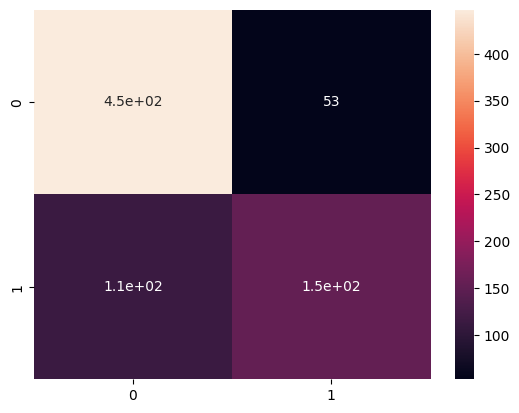

In [18]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [19]:
logistic.score(X, y)

0.7825520833333334

In [20]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [21]:
poly = PolynomialFeatures(2)

In [22]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.


In [72]:
# Оценка качества модели
print("Accuracy:", logistic.score(X, y))

Accuracy: 0.7825520833333334


<Axes: >

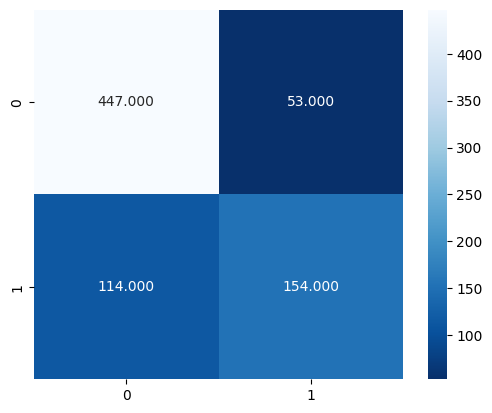

In [73]:
conf_matrix = metrics.confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".3f", square = True, cmap = 'Blues_r')

In [76]:
# Изменение аргументов при создании модели
# Пример изменения параметра регуляризации (C) на 0.1
logistic_low_reg = LogisticRegression(C=0.1)
logistic_low_reg.fit(X, y)
y_pred_low_reg = logistic_low_reg.predict(X)
print("Accuracy with low regularization:", logistic_low_reg.score(X, y))

Accuracy with low regularization: 0.77734375


C:\Users\berni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# Пример использования другого метода оптимизации (solver)
logistic_new_solver = LogisticRegression(solver='saga', max_iter=1000)
logistic_new_solver.fit(X, y)
y_pred_new_solver = logistic_new_solver.predict(X)
print("Accuracy with new solver:", logistic_new_solver.score(X, y))


Accuracy with new solver: 0.6966145833333334


C:\Users\berni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
1) Метод опорных векторов
    1. Без ядра
    2. С линейным ядром
    3. С гауссовым ядром
    4. С полиномиальным ядром
2) Метод ближайших соседей
3) Многослойный перцептрон
4) Дерево решений
5) Наивный байесовский классификатор
6) (*) Другие методы:
    1. Пассивно-агрессивный классификатор
    2. Гребневый классификатор
    3. Случайный лес
    4. Беггинг
    5. Другие модели по желанию

##### Метод опорных векторов Без ядра

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Создаем модель SVM без ядра
svm_model = SVC(kernel='linear')

# Обучаем модель на обучающих данных
svm_model.fit(X, y)

# Предсказываем классы для тестовых данных
y_pred_svm = svm_model.predict(X)

# Выводим матрицу классификации
print("Confusion Matrix for SVM:")
print(confusion_matrix(y, y_pred_svm))

# Вычисляем точность модели
accuracy_svm = accuracy_score(y, y_pred_svm)
print("Accuracy for SVM: {:.2f}%".format(accuracy_svm * 100))


Confusion Matrix for SVM:
[[443  57]
 [114 154]]
Accuracy for SVM: 77.73%


##### Метод опорных векторов С линейным ядром